<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 5 heads, you win 30 dollars. 
```
```
Otherwise you loss 10 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [85]:
function binomial_p(n,k,p)
    return factorial(n)/(factorial(k)*factorial(n-k)) * p^k * (1-p)^(n-k)
end

binomial_p (generic function with 1 method)

In [86]:
binomial_p(10,2,0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [87]:
win = binomial_p(10,5,0.4) # 10 tosses, 5 heads, 0.4 probability of heads

0.20065812480000003

The chance of losing the bet:

In [88]:
lose = 1 - binomial_p(10,5,0.4) # all possibilities besides 5 heads

0.7993418752

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [89]:
Expected_outcome = (win.*30) + (lose.*-10)
println("The expected value is $Expected_outcome so you'd expect to lose money.")

The expected value is -1.973675007999999 so you'd expect to lose money.


### 1.4

1. What if you need to get exactly 4 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [90]:
# 1.
win2 = binomial_p(10,4,0.4) # 10 tosses, 4 heads, 0.4 probability of heads
println("The probability of winning (exactly 4 heads) is $win2.")
lose2 = 1-win2 # all possibilities besides 4 heads
println("The probability of losing (not exactly 4 heads) is $lose2.")

The probability of winning (exactly 4 heads) is 0.250822656.
The probability of losing (not exactly 4 heads) is 0.749177344.


In [91]:
# 2. 
Expected_outcome = (win2.*30) + (lose2.*-10)
println("The expected value is $Expected_outcome so you'd expect to gain money.")

The expected value is 0.03290623999999909 so you'd expect to gain money.


# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 3x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [92]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `C:\Users\thesp\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\thesp\.julia\environments\v1.8\Manifest.toml`


In [93]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [94]:
x = 0:1:10
y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [95]:
# 1. 
using Polynomials: Polynomial, fit, coeffs
line_fit = fit(x,y_observed,1)

# 2.
fit_coeff = coeffs(line_fit)

2-element Vector{Float64}:
 -3.671413247623511
  3.2110499746372185

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [96]:
function chisqr(b,m,x,y_observed,sigma)
    return sum((y_observed .- m .* x .-b).^2/sigma^2)
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [97]:
# 1.
chi2_list = [] # empty list

# 2. and 3.
for repeat in 1:10000
    # Generate new noise for model
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise;

    # Fit line to new data
    line_fit = fit(x,y_observed,1)
    b,m = coeffs(line_fit)

    # Calculate chi2
    chi2 = chisqr(b,m,x,y_observed,sigma)
    push!(chi2_list,chi2)
end

chi2_list

10000-element Vector{Any}:
 16.37378258109487
  9.56185362298475
  8.983578597902781
  6.191980108670283
  3.978894896748411
 13.374518677902545
 13.821358051575825
 10.517716064173964
  4.930377062667768
  7.306918515790603
  9.47457299008823
 10.788051786002876
 16.29167976364754
  ⋮
  5.183711359681098
 13.947574891797041
 14.409341304992502
  4.083029961074886
  5.2473143715434425
  6.410180810823092
  7.666154717034425
 10.673561503669236
 13.699520263830165
 10.480950938657104
  6.307685737270016
 10.250951644933394

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [98]:
# 1.
using Statistics
dof = mean(chi2_list)

8.992293329346609

<b1># 2.<br>
N-M = 11-2 = 9 so yes it's sensical

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:30
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [99]:
# 1.
chi2di = di.Chisq(dof)

# 2.
x_dist = 0:0.1:30

# 3.
pdf = di.pdf.(chi2di, x_dist)

301-element Vector{Float64}:
 0.0
 1.1623657272648197e-6
 1.2475934539560762e-5
 4.897779524687393e-5
 0.00012737630734830586
 0.00026435379483863696
 0.0004756637707264275
 0.0007756059739931207
 0.0011767244394154627
 0.0016896500677471057
 0.00232304136976341
 0.00308359347518648
 0.003976094933240875
 ⋮
 0.0002601129902868798
 0.00025043330219103933
 0.00024110380490824503
 0.0002321122800561641
 0.0002234469152458778
 0.0002150962915127337
 0.00020704937109390748
 0.00019929548554514757
 0.00019182432418919995
 0.00018462592288850515
 0.00017769065313481732
 0.00017100921144847357

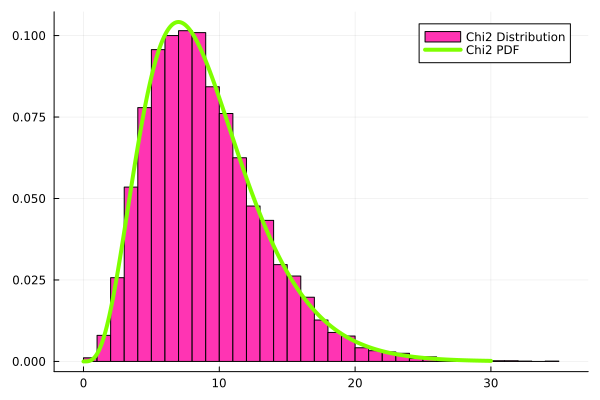

In [100]:
# 4.
using Plots
histogram(chi2_list, bins=50, normalize=true, color="maroon1",label= "Chi2 Distribution")

# 5.
plot!(x_dist, pdf, color="chartreuse1", linewidth = 4, label="Chi2 PDF")

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:5
3. Define b_range = -7:0.01:3
4. Make a contour plot to visualize the distribution of the likelihood


In [101]:
# 1.
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

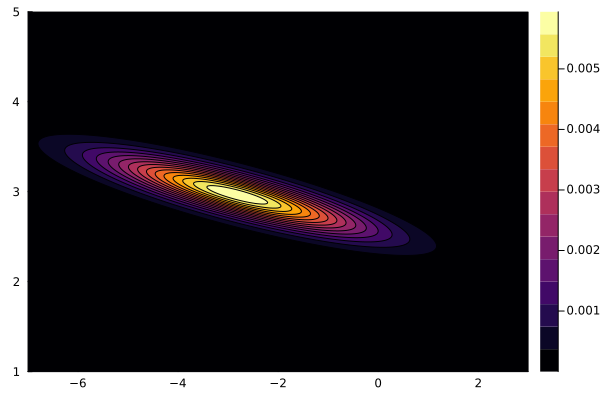

In [102]:
# 2.
m_range = 1:0.01:5

# 3.
b_range = -7:0.01:3

# 4.
contourf(b_range,m_range,p_chi2poly)

### 2.7

1. Redefine x = 0:0.5:5 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

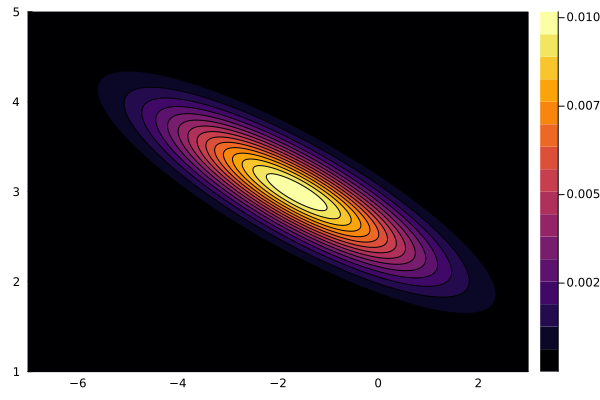

In [103]:
# 1.
x = 0:0.5:5

y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

contourf(b_range,m_range,p_chi2poly)

The width of the contour is greater than in the previous figure. Lower x-value makes it tougher to estimate slope.

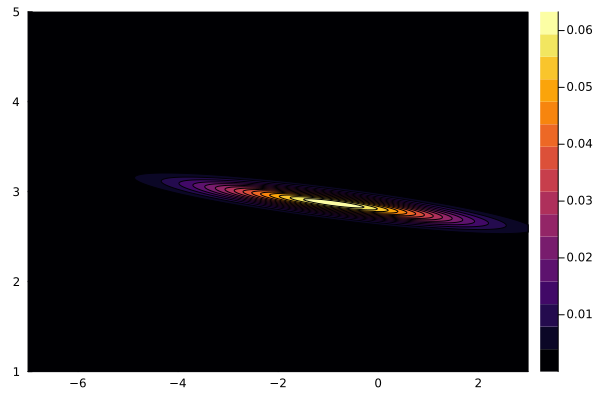

In [104]:
# 2.
x = 0:2:20

y_true = 3 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

contourf(b_range,m_range,p_chi2poly)

This figure has very thin width. This means the slope is much easier to estimate since x range is larger.

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

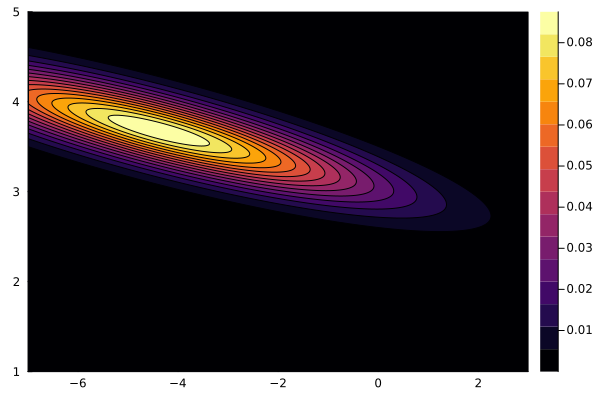

In [105]:
# 1.
x = 0:1:10

y_true = 3 .* x .- 2
sigma = 5
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

contourf(b_range,m_range,p_chi2poly)

Greater std means more noise occuring in both m and b directions.

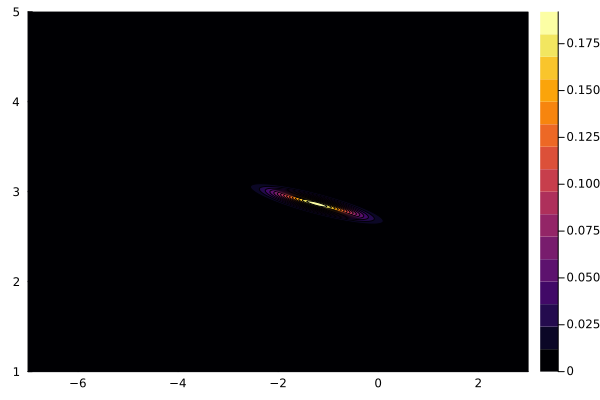

In [106]:
# 2.
x = 0:1:10

y_true = 3 .* x .- 2
sigma = 1
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

contourf(b_range,m_range,p_chi2poly)

Smaller std means less noise occuring in both m and b directions.